In [56]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import math
import random
import networkx as nx
from sympy import *      
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np        
from matplotlib import cm
import pylab
import time

In [57]:
def making_layer_A_random_regular(i, nodes, edges, Max, Min) :     ## i = [   ]  kinds of states
    global A, A_edges, max_A, MAX, MIN
    A = np.array(i * int(nodes/len(i)), int)
    random.shuffle(A)
    MAX = Max
    MIN = Min
    A_edges = nx.random_regular_graph(edges, nodes, seed=None)
    return A, A_edges, MAX, MIN

def making_layer_B_random_regular(i, nodes, edges) :
    global B, B_edges
    B = np.array(i * int(nodes/len(i)), int)
    random.shuffle(B)
    B_edges = nx.random_regular_graph(edges, nodes, seed=None)
    return B, B_edges

def making_interconnected_edges(A_nodes, inter_edges) :
    global AB_edges, AB_neighbor
    AB_edges = []
    AB_neighbor = []
    for i in range(int(A_nodes/inter_edges)) :
        for j in range(inter_edges) :
            connected_A_node = np.array((A_edges.nodes)).reshape((-1, inter_edges))[i][j]
            AB_neighbor.append(connected_A_node)
            AB_edges.append((i, connected_A_node))
    AB_neighbor = np.array(AB_neighbor).reshape(-1, inter_edges)
    return AB_edges, AB_neighbor

def A_layer_node_left(a, MIN) :
    if a == MIN :
        a = a
    elif a < 0 or a > 1 :
        a = a - 1
    elif a == 1 :
        a = -1
    return a
            
def A_layer_node_right(a, MAX) :
    if a == MAX :
        a = a
    elif a > 0 or a < -1 :
        a = a + 1
    elif a == -1 :
        a = 1
    return a

def A_layer_dynamics() :
    for i, j in sorted(A_edges.edges()) :
        if A[i] > 0 and A[j] > 0 :
            z1 = random.random()
            if z1 < prob_p :
                A[i] = A_layer_node_right(A[i], MAX)
                A[j] = A_layer_node_right(A[j], MAX)                      
        elif A[i] < 0 and A[j] < 0 :
            z2 = random.random()
            if z2 < prob_p :
                A[i] = A_layer_node_left(A[i], MIN)
                A[j] = A_layer_node_left(A[j], MIN)      
        elif A[i] * A[j] == -1 :
            z3 = random.random()
            if z3 < ((1-prob_p)/2) :
                A[i] = 1
                A[j] = 1  
            elif z3 > ((1-prob_p)/2) and z3 < (1-prob_p)  :
                A[i] = -1
                A[j] = -1                  
        elif A[i] > 0 and A[j] < 0 :
            z4 = random.random()
            if z4 < 1-prob_p :
                A[i] = A_layer_node_left(A[i], MIN)
                A[j] = A_layer_node_right(A[j], MAX) 
        elif A[i] < 0 and A[j] > 0 :
            z5 = random.random()
            if z5 < 1-prob_p :
                A[i] = A_layer_node_right(A[i], MAX)
                A[j] = A_layer_node_left(A[j], MIN) 
    for i, j in sorted(AB_edges) :       
        if A[j] > 0 and B[i] > 0 :
            z6 = random.random()
            if z6 < prob_p :
                A[j] = A_layer_node_right(A[j], MAX)
        elif A[j] < 0 and B[i] < 0 :
            z7 = random.random()
            if z7 < prob_p :
                A[j] = A_layer_node_right(A[j], MAX)
        elif A[j] * B[j] == -1 :
            z8 = random.random()
            if z8 < ((1-prob_p)/2) :
                A[i] = 1
            elif z8 > ((1-prob_p)/2) and z8 < (1-prob_p)  :
                A[i] = -1
        elif A[j] > 0 and B[i] < 0 :
            z9 = random.random()
            if z9 < 1-prob_p :
                A[j] = A_layer_node_left(A[j], MIN)
        elif A[j] < 0 and B[i] > 0 :
            z10 = random.random()
            if z10 < 1-prob_p :
                A[j] = A_layer_node_right(A[j], MAX)
    return A


def B_layer_dynamics() :
    for i in sorted(B_edges.nodes) :
        opposite = []
        intra_edge_number = len(sorted(nx.all_neighbors(B_edges, i)))
        inter_edge_number = len(AB_neighbor[i])
        for j in range(intra_edge_number) :
            if B[i] * B[sorted(nx.all_neighbors(B_edges, i))[j]] < 0 :
                opposite.append(1)
        for j in range(inter_edge_number):
            if B[i] * A[AB_neighbor[i][j]] < 0 :
                opposite.append(1)
        oppo_plus = sum(opposite) / (inter_edge_number + intra_edge_number)
        if not oppo_plus == 0 : 
            prob_beta = (oppo_plus)**(beta)
            z11 = random.random()
            if z11 < prob_beta :
                B[i] = -B[i]
    return B

def interconnected_dynamics() :
    global Probability_plus, total, starttime, endtime, passtime, r, prob_p, beta, B_plus, A_plus
    starttime = time.time()
    Probability_plus = 0
    total = 0
    while True :
        A_layer_dynamics()
        B_layer_dynamics()
        total += 1 
        if (np.all(A > 0) == 1 and np.all(B > 0) == 1) or (np.all(A < 0)== 1 and np.all(B < 0)== 1) or (total == 1000) :
            break
    endtime = time.time()
    passtime = endtime - starttime
    if np.all(A > 0) == 1 and np.all(B > 0) == 1 :
        Probability_plus +=1
    elif np.all(A < 0)== 1 and np.all(B < 0)== 1 :
        Probability_plus +=0
    elif total == 1000 :
        Probability_plus +=0
    B_plus = sum(B)
    A_plus = sum(A)
    return A, B, A_plus, B_plus, passtime, Probability_plus


def repeated_and_mean() :
    global R, V, P, PA, mean_P, mean_PA, mean_PT, mean_Probability_plus, mean_P_plus, Ganma, Beta, data_result1
    PT = []
    P = []
    PA = []
    R = []
    V = []
    mean_Probability_plus = []
    mean_P = []
    mean_PA = []
    mean_P_plus = [] 
    mean_PT = []
    Ganma = []
    Beta = []    
    for i in range(0, 100) :
        A_layer
        B_layer
        interconnected_dynamics()
        PT.append(passtime)
        mean_Probability_plus.append(Probability_plus)
        P.append(B_plus / 128)
        PA.append(A_plus / 128)
        R.append(ganma)
        V.append(beta)
    data_ganma = pd.Series(R)
    data_beta = pd.Series(V)
    data_PT = pd.Series(PT)
    data_P = pd.Series(P)
    data_PA = pd.Series(PA)
    data_P_plus = pd.Series(mean_Probability_plus)

    Ganma.append(ganma)
    Beta.append(beta)
    mean_P.append(sum(P) / 100)
    mean_PA.append(sum(PA) / 100)
    mean_P_plus.append(sum(mean_Probability_plus) / 100)
    mean_PT.append(sum(PT) / 100)
    
    data_result1 = pd.DataFrame({'ganma': data_ganma, 'beta' : data_beta, 'A layer sum' : data_PA,'B layer sum' : data_P, 
                                 'Probability +' : data_P_plus,'Time' : data_PT})

    return Ganma, Beta, mean_P, mean_PA, mean_PT, mean_P_plus, data_result1

def making_dataframe() :    
    global data_result2
    repeated_and_mean()
    
    data_ganma_m = pd.Series(Ganma)
    data_beta_m = pd.Series(Beta)
    data_PT_m = pd.Series(mean_PT)
    data_P_m = pd.Series(mean_P)
    data_PA_m = pd.Series(mean_PA)
    data_P_plus_m = pd.Series(mean_P_plus)    
    
    data_result2 = pd.DataFrame({'ganma': data_ganma_m, 'beta' : data_beta_m, 'A layer mean' : data_PA_m,'B layer mean' : data_P_m, 
                                 'Probability + mean' : data_P_plus_m,'Time mean' : data_PT_m})
    return data_result1, data_result2

def saving_data() :
    total_data1.to_pickle('total_data1.pickle')
    total_data2.to_pickle('total_data2.pickle')

In [ ]:
A_layer = making_layer_A_random_regular([1,2], 128, 3, 2, -2)
B_layer = making_layer_B_random_regular([-1], 128, 3)
making_interconnected_edges(128, 1)
r = np.linspace(0, 2, 100)
D = np.linspace(0, 10, 100)
total_data1 = pd.DataFrame()
total_data2 = pd.DataFrame()
for ganma in r :
    for beta in D : 
        prob_p = ganma / 1+ganma
        making_dataframe()
        total_data1 = total_data1.append(data_result1)
        total_data2 = total_data2.append(data_result2)
saving_data()

In [40]:
final_data = pd.read_pickle('total_data2.pickle')

,A layer mean,B layer mean,Probability + mean,Time mean,beta,ganma
0,-0.004531,-0.006250,0.0,1.481229,0.000000,0.0
0,-0.007188,-0.011094,0.0,1.514440,0.050505,0.0
0,-0.003281,0.004687,0.0,1.509918,0.101010,0.0
0,0.006875,0.005000,0.0,1.547157,0.151515,0.0
0,0.005938,0.011250,0.0,1.583610,0.202020,0.0
0,-0.002500,0.003281,0.0,1.586129,0.252525,0.0
0,-0.012031,-0.011094,0.0,1.546666,0.303030,0.0
0,0.015938,0.020156,0.0,1.527851,0.353535,0.0
0,-0.002344,-0.015469,0.0,1.518368,0.404040,0.0
0,-0.001094,0.004687,0.0,1.503401,0.454545,0.0


In [54]:
sum(final_data['B layer mean']== 1)

9757

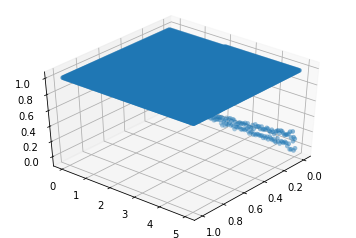

In [26]:
ax=plt.axes(projection='3d')
ax.scatter(final_data['ganma'], final_data['beta'], final_data['B layer mean'], c=final_data['B layer mean'], cmap='viridis', linewidth=0.1)
ax.view_init(90,0)

In [203]:
final_data2 = pd.read_pickle('total_data1.pickle')

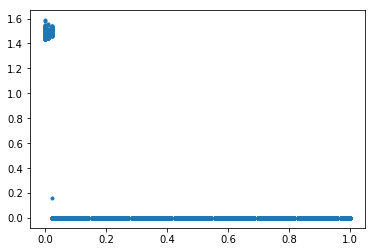

In [200]:
 plt.plot(total_data2.iloc[:,5], total_data2.iloc[:,3], '.')